In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Analyze dataset

In [3]:
path = "/content/drive/MyDrive/Machine_Learning/Linear_Regression"
df = pd.read_csv(path + "/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### Encoding data

In [14]:
# encoding columns of df
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# encode above columns
df["mainroad"] = le.fit_transform(df["mainroad"])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


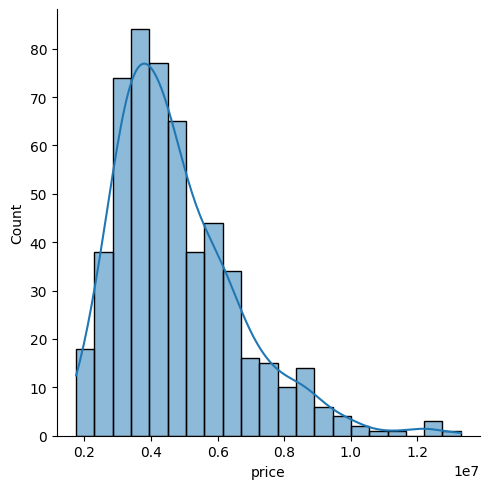

In [15]:
sns.displot(df["price"], kde=True)

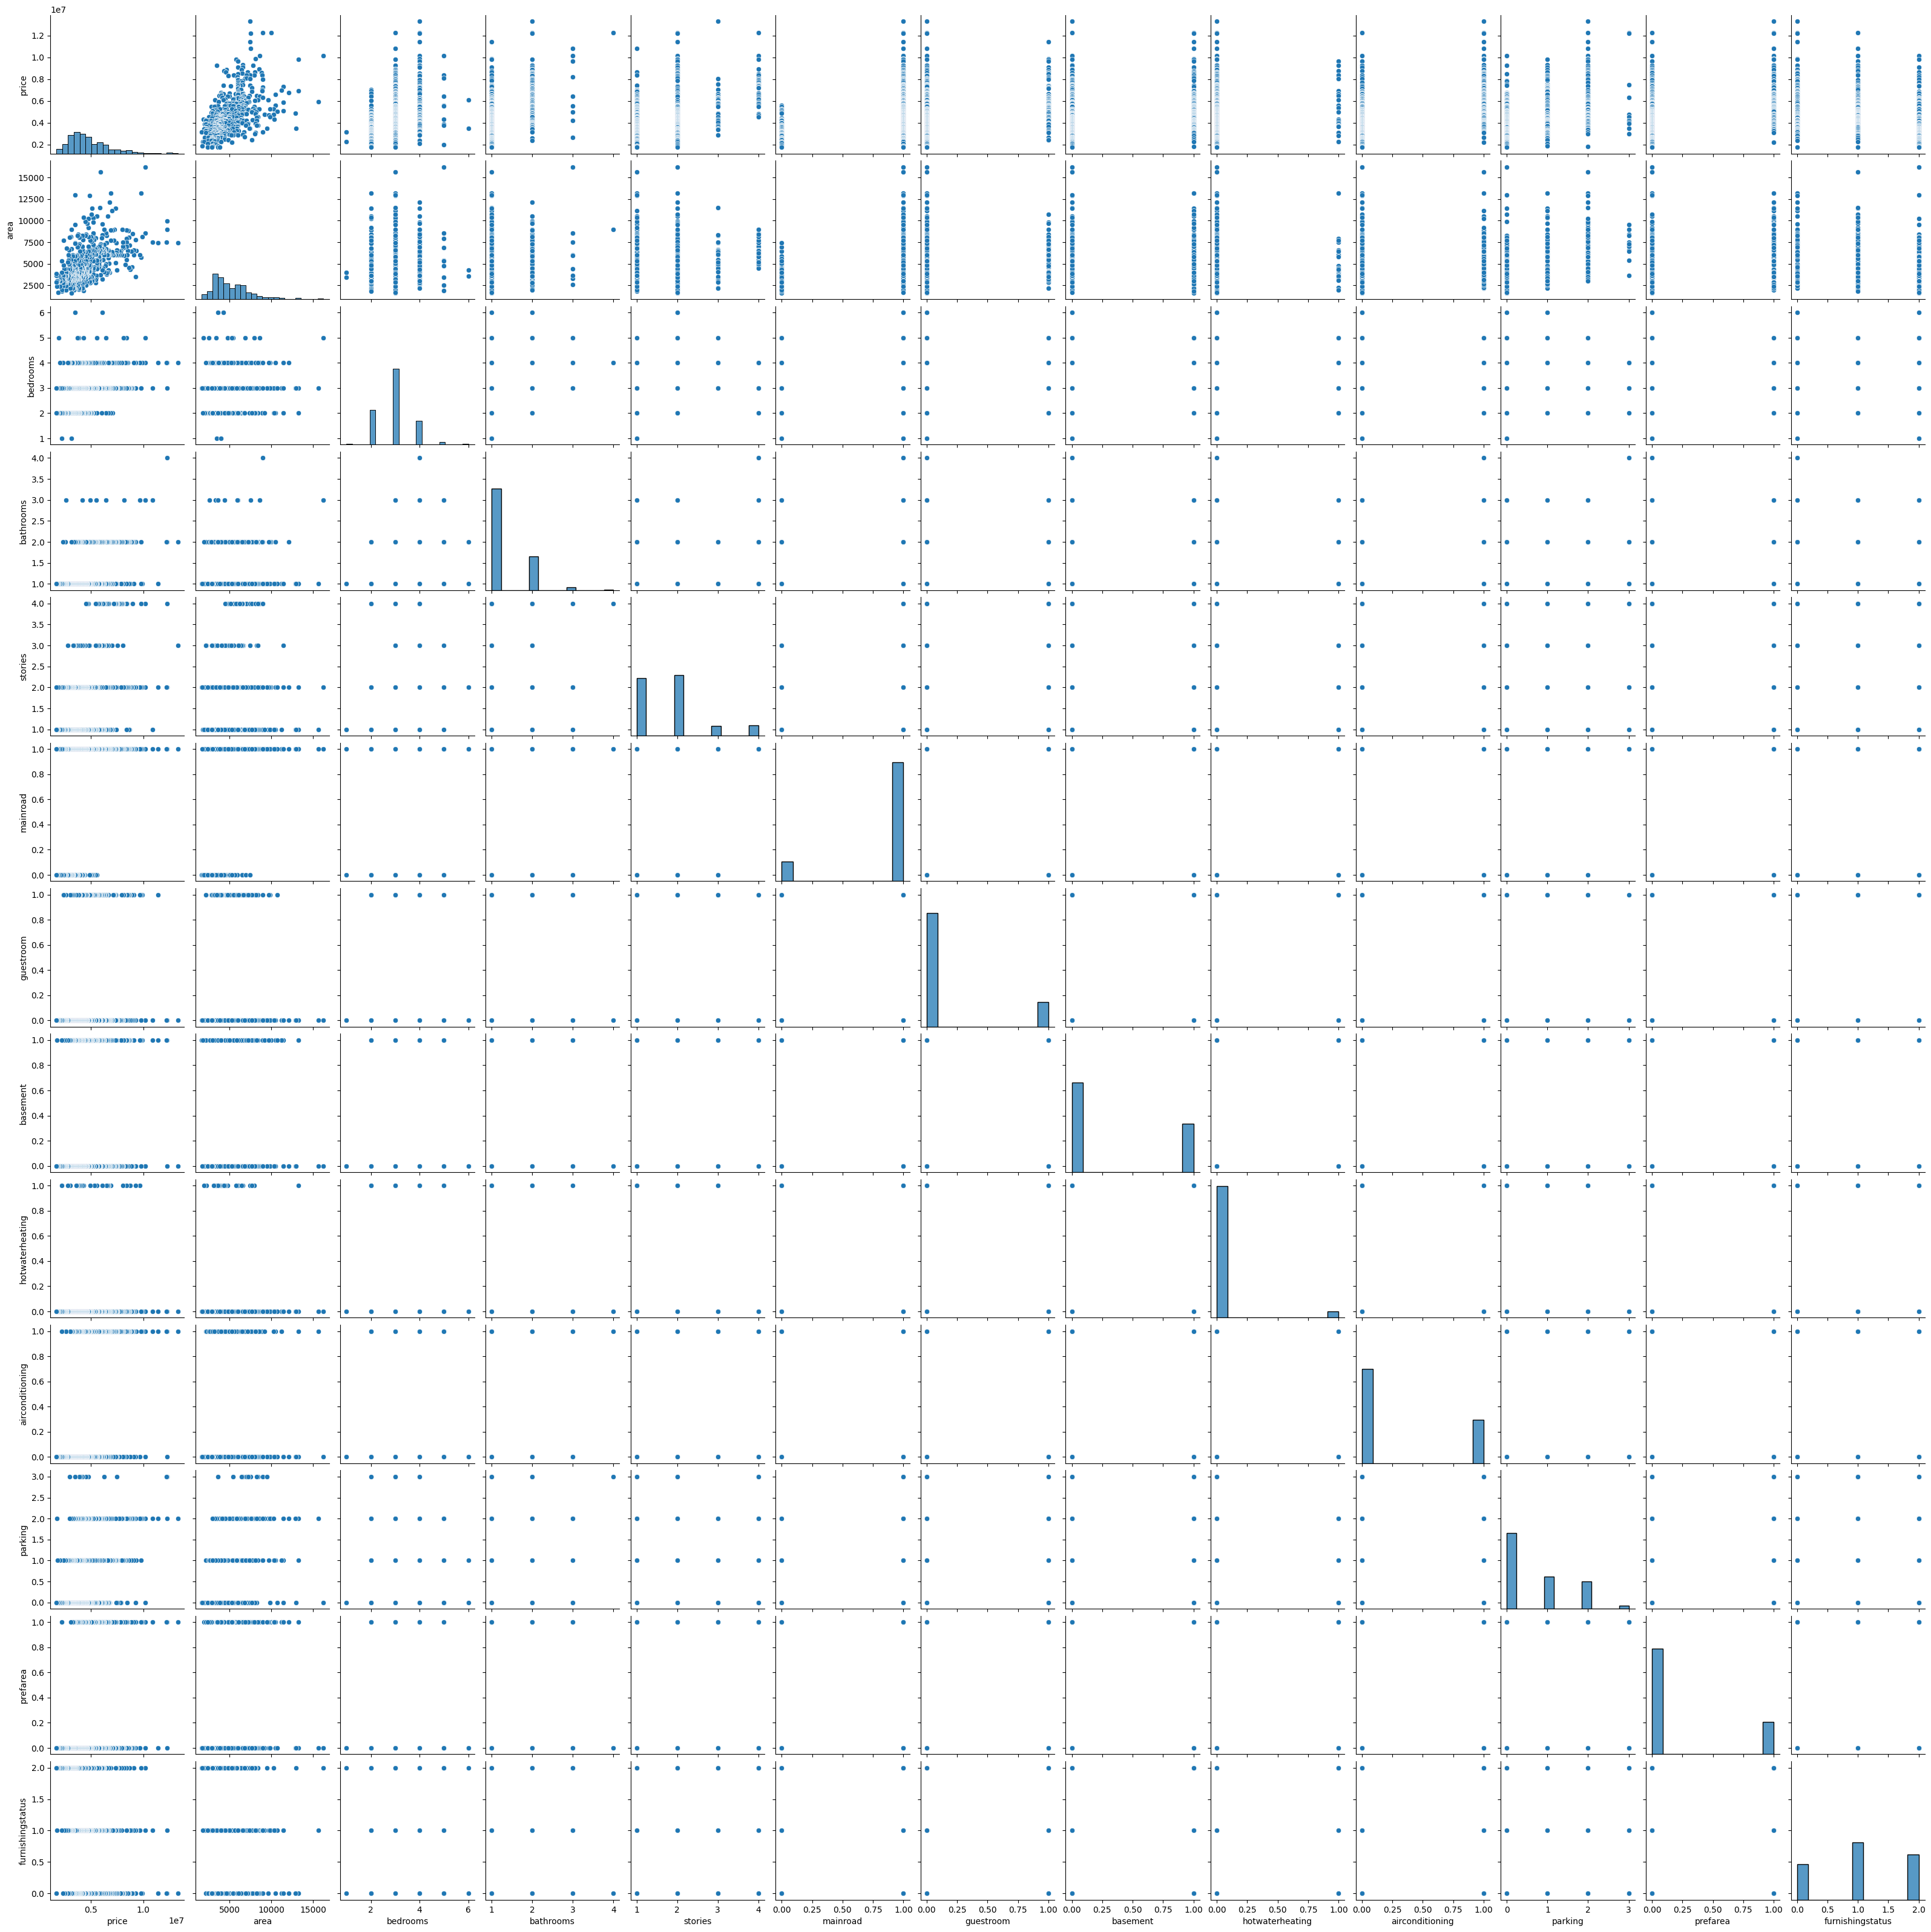

In [16]:
sns.pairplot(df)

<Axes: >

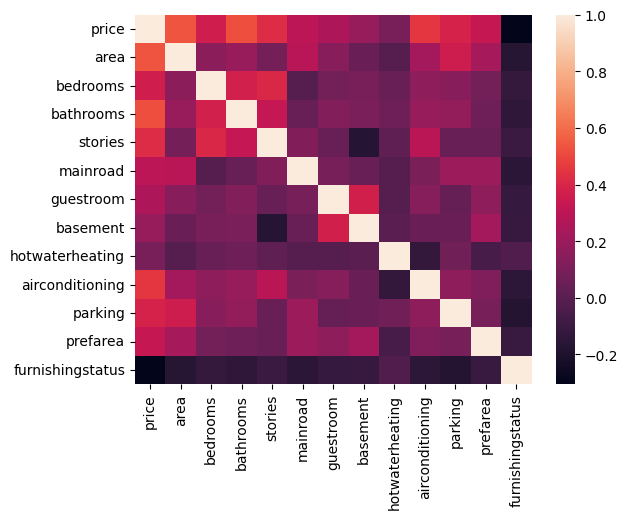

In [18]:
sns.heatmap(df.corr())

In [20]:
# splitting data into source and target variables
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

X.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0


In [21]:
y = df["price"]
y.head(2)

,price
0,13300000
1,12250000


In [68]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.20)
    Q3 = data.quantile(0.80)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Example usage (assuming 'df' is your DataFrame and 'price' is the column):
outliers = find_outliers_iqr(df['price'])
print("Outliers in 'price' column:")
print(outliers)

# You can apply this function to other numerical columns as well
# Example for 'area' column
outliers_area = find_outliers_iqr(df['area'])
print("\nOutliers in 'area' column:")
outliers_area

Outliers in 'price' column:
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
5    10850000
Name: price, dtype: int64

Outliers in 'area' column:


,area
7,16200
10,13200
56,11440
66,13200
69,12090
125,15600
129,11460
186,11410
211,12900
403,12944


# Training model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
print(model.intercept_)
print(model.coef_)

293083.06915066857
[ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]


In [30]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
cdf

,Coefficient
area,2.358488e+02
bedrooms,7.857449e+04
bathrooms,1.097117e+06
stories,4.062232e+05
mainroad,3.668242e+05
guestroom,2.331468e+05
basement,3.931598e+05
hotwaterheating,6.878813e+05
airconditioning,7.855506e+05
parking,2.257565e+05


# Prediction

In [31]:
y_pred = model.predict(X_test)

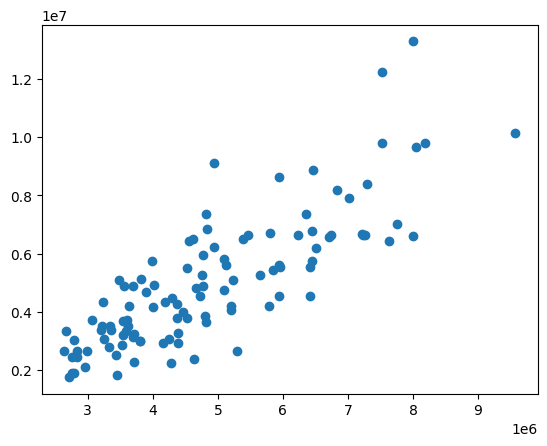

In [34]:
plt.scatter(y_pred, y_test)

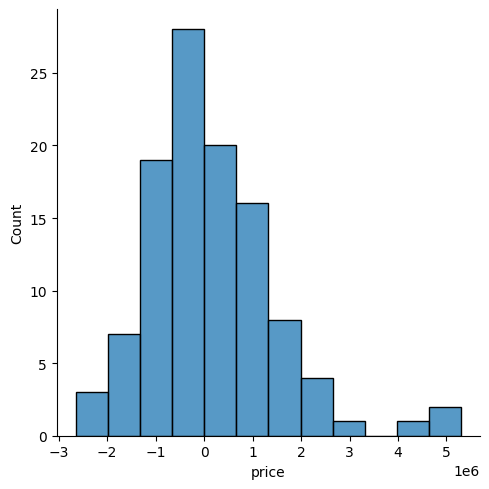

In [35]:
sns.displot(y_test - y_pred)

In [36]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

MAE:  979679.6912959901
MSE:  1771751116594.0352


In [37]:
print("RMSE: ", metrics.root_mean_squared_error(y_test, y_pred))

RMSE:  1331071.4167895108


In [39]:
print("R-squared: ", metrics.r2_score(y_test, y_pred))

R-squared:  0.6494754192267803


In [60]:
def predict_price(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus):
  data = pd.DataFrame([[area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]], columns=df.columns[1:])
  predicted_Price = model.predict(data)
  print("Price : $", round(y_nwe[0]/1000000, 2),"Million")
  return predicted_Price

In [61]:
predict_price(10000, 6, 6, 2, 0, 3, 1, 1, 1, 1, 2, 1)

Price : $ 14.36 Million


array([14359362.35042565])